In [2]:
#to process text data import this lib
import xmltodict

In [3]:
#get text data and verify that it is working properly
xml = 'RawDataFolder/sms-20180303224019.xml'
#with open(xml, 'rb') as xmldoc:
xmldoc = open(xml, 'rb')
raw_texts = xmltodict.parse(xmldoc)
#print(raw_texts['smses'].keys())
#for text in raw_texts['smses']['sms'][:3]:
#    print(text)

In [4]:
#set up libs and options
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from six.moves import range

# Setup Pandas
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

test Myers Briggs data

In [5]:
import pandas as pd
reddit_text = pd.read_csv('RawDataFolder/Reddit_mbti_data_2.csv',encoding='utf-8').set_index('Name')

In [6]:
reddit_text_filler = pd.read_csv('RawDataFolder/Reddit_mbti_data_filler.csv',encoding='utf-8').set_index('Name')

In [195]:
#import mbti data from kaggle
Meyers_text = pd.read_csv('RawDataFolder/mbti_1.csv')

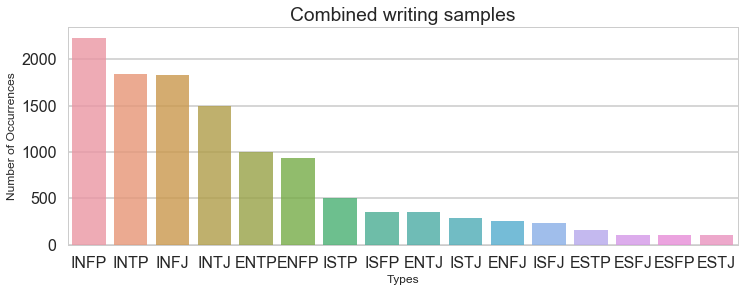

In [199]:
#check distribution of all the collected types
import matplotlib.pyplot as plt
import seaborn as sns

combined_sample = pd.concat([pd.concat([reddit_text.mbti, Meyers_text.type], ignore_index=True), reddit_text_filler.mbti], ignore_index=True)
cnt_srs = combined_sample.value_counts()

plt.figure(figsize=(12,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.title('Combined writing samples')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()

In [9]:
combined_sample = pd.concat([pd.concat([reddit_text.mbti, Meyers_text.type], ignore_index=True), reddit_text_filler.mbti], ignore_index=True)
cnt_srs = combined_sample.value_counts()
print('Combined users: ')
print(cnt_srs)

Combined users: 
INFP    2237
INTP    1844
INFJ    1836
INTJ    1500
ENTP    1005
ENFP     933
ISTP     498
ISFP     350
ENTJ     350
ISTJ     282
ENFJ     256
ISFJ     238
ESTP     160
ESFJ     102
ESFP     102
ESTJ     101
dtype: int64


In [10]:
cnt_srs = reddit_text[reddit_text.text_count<40].mbti.value_counts()
print('Combined users: ')
print(cnt_srs)

Combined users: 
INTP    83
INTJ    73
INFJ    65
INFP    64
ENTP    44
ENFP    40
ISTP    31
ENTJ    23
ISFJ    21
ISFP    15
ENFJ    14
ESTP    12
ESFP    10
ISTJ     9
ESFJ     8
ESTJ     8
Name: mbti, dtype: int64


In [11]:
print(reddit_text.drop('text', axis=1)[reddit_text.text_count<50])

                      mbti  text_count
Name                                  
sweetsleeper          INTP        37.0
CleanDevelopment      ISTP        15.0
FunEquivalent         ISFP        34.0
Ayumu916              INFP        29.0
anacmelo              INTJ        25.0
suzythecreator        ISTP        28.0
magdaUl               ENTP         5.0
TheBureaucratJosephK  INTJ        40.0
analysis_god          INTP        34.0
PM-me-ur-MBTI-quirk   INFJ         7.0
Pos_Ki                INTJ        23.0
SousanTheMage         INTP        36.0
EffectiveEdge         ENFP         9.0
dashing-rainbows      ISTJ        29.0
Blissnoir             ISFJ        21.0
lle-ell               ENTP        47.0
IdealisticDegenerate  ENFP        17.0
TRlLLS                ENTJ        18.0
Plaid_Warlock         INTJ         8.0
arcticsehnsucht       INFP        39.0
taco-kat              INFP        49.0
jerompe               ENFP         9.0
pariah_piranha        INFP        28.0
Struggling_Millenial  EST

In [12]:
Meyers_text = Meyers_text.rename(index=str, columns={"type": "mbti", "posts": "text"})
combined_data = reddit_text.append([Meyers_text, reddit_text_filler], ignore_index=True).fillna(50)

In [263]:
from sklearn.utils import shuffle
even = True
if even==True:
    #randomly select 100 examples of each
    combined_data_evened = shuffle(combined_data.groupby('mbti').apply(lambda x: x.sample(100)).reset_index(drop=True))
else:
    combined_data_evened = combined_data
    

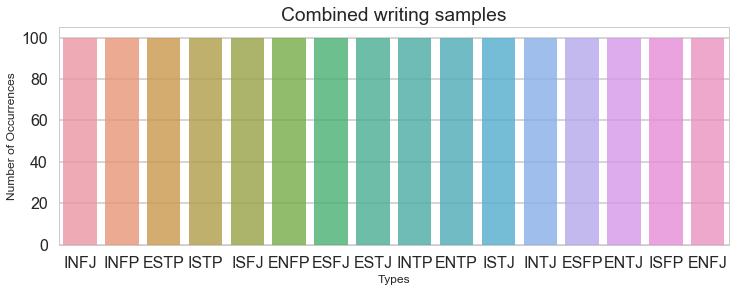

In [264]:
#check distribution of all the collected types
import matplotlib.pyplot as plt
import seaborn as sns

cnt_srs = combined_data_evened.mbti.value_counts()

plt.figure(figsize=(12,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.title('Combined writing samples')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()

In [265]:
#split the data into test and training groups via mask
from sklearn.model_selection import train_test_split
_, itest_mbti = train_test_split(range(len(combined_data_evened['text'])), train_size=.1)
mask_mbti = np.zeros(len(combined_data_evened['text']), dtype=np.bool)
mask_mbti[itest_mbti] = True

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [266]:
#initialized text processing libs and vars
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer_mtbi = TfidfVectorizer(ngram_range=(1, 1), 
                         stop_words='english',
                         lowercase = True, 
                         max_features = 5000)
#vectorizer_mtbi = CountVectorizer(min_df=10,stop_words=‘english’)

In [267]:
#create arrays for results
y_IE = (combined_data_evened.mbti.str.contains('I') == 1).values.astype(np.int)
y_NS = (combined_data_evened.mbti.str.contains('N') == 1).values.astype(np.int)
y_TF = (combined_data_evened.mbti.str.contains('F') == 1).values.astype(np.int)
y_JP = (combined_data_evened.mbti.str.contains('J') == 1).values.astype(np.int)

In [268]:
#create one true results dataframe
y = pd.concat([pd.DataFrame(y_IE),pd.DataFrame(y_NS),pd.DataFrame(y_TF),pd.DataFrame(y_JP)], \
              keys = ['y_IE','y_NS','y_TF','y_JP'],axis=1)

print(combined_data_evened.mbti[:5])
print(y[:5])

1092    INTJ
687     ESTJ
699     ESTJ
1319    ISFP
31      ENFJ
Name: mbti, dtype: object
  y_IE y_NS y_TF y_JP
     0    0    0    0
0    1    1    0    1
1    0    0    0    1
2    0    0    0    1
3    1    0    1    0
4    0    1    1    1


In [269]:
#preprocess all the mbti data
import re
from bs4 import BeautifulSoup

elim_mbti_type=True

#add a removal of all mtbi classes                                                 <-change
def cleanText(text):
    #text = BeautifulSoup(text, "lxml").text
    text = text.lower()
    text = re.sub(r"'", r'', text)
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    if (elim_mbti_type==True):
        text = re.sub(r'intp', r'<MBTI>', text)
        text = re.sub(r'intj', r'<MBTI>', text)
        text = re.sub(r'infj', r'<MBTI>', text)
        text = re.sub(r'infp', r'<MBTI>', text)
        text = re.sub(r'entp', r'<MBTI>', text)
        text = re.sub(r'enfp', r'<MBTI>', text)
        text = re.sub(r'istp', r'<MBTI>', text)
        text = re.sub(r'entj', r'<MBTI>', text)
        text = re.sub(r'isfj', r'<MBTI>', text)
        text = re.sub(r'enfj', r'<MBTI>', text)
        text = re.sub(r'isfp', r'<MBTI>', text)
        text = re.sub(r'esfp', r'<MBTI>', text)
        text = re.sub(r'estp', r'<MBTI>', text)
        text = re.sub(r'estj', r'<MBTI>', text)
        text = re.sub(r'esfj', r'<MBTI>', text)
        text = re.sub(r'istj', r'<MBTI>', text)
    return text
combined_data_evened['clean_text'] = combined_data_evened['text'].apply(cleanText)
print(combined_data_evened['clean_text'][0])

daily practice.  whatever you do, just work at it daily. as a professional artist i have a process and the only way to establish process is to work at it daily. once you understand your own proces youll be able to make in a much more comfortable environment and have a lot more confidence.   my process begins with research and ideating. i read and sketch and write. that is the thinking bit.  sometimes that moves into a waitig period where i digest what ive learned and im thinking.  and that moves into the creating part of it.   thinking and planning are equally important parts of the creative process as making is. i think as far as getting over your anxieties about it you just need to start someplace. like literally, start anywhere and just keep going.       i am guilty of being that girl.  i am trying very hard not to be. i cant cum when pressured, i cant possibly expect my partner to.  thanks for expanding and sharing!   i am sure!  i have read a lot about how the emphasis on finishin

In [270]:
#preform the data split
X = vectorizer_mtbi.fit_transform(combined_data_evened['clean_text'])

xtrain=X[mask_mbti]
ytrain=y[mask_mbti]
xtest=X[~mask_mbti]
ytest=y[~mask_mbti]

from sklearn.metrics import classification_report

In [271]:
vectorizer_mtbi.vocabulary_

{'challenge': 739,
 'try': 4647,
 'buildings': 643,
 'theres': 4500,
 'congratulations': 967,
 'just': 2480,
 'discovered': 1297,
 'secret': 3885,
 'recipe': 3611,
 'success': 4319,
 'power': 3383,
 'lesson': 2599,
 'learnt': 2578,
 'insult': 2343,
 'mbti': 2785,
 'like': 2622,
 'sounds': 4128,
 'lot': 2691,
 'ti': 4532,
 'si': 3995,
 'loop': 2681,
 'behaviour': 487,
 'maybe': 2784,
 'using': 4738,
 'auxiliary': 411,
 'ne': 2976,
 'bit': 528,
 'say': 3838,
 'omg': 3110,
 'new': 3004,
 'card': 690,
 'confirmed': 957,
 'tl': 4553,
 'im': 2231,
 'active': 150,
 'game': 1874,
 'forums': 1817,
 'reddit': 3622,
 'written': 4960,
 'explanations': 1605,
 'abstract': 112,
 'concepts': 940,
 'pictures': 3284,
 'easily': 1416,
 'bad': 437,
 'posts': 3374,
 'lazy': 2563,
 'write': 4956,
 'use': 4730,
 'doesnt': 1331,
 'make': 2728,
 'look': 2677,
 'impulsive': 2263,
 'party': 3200,
 'animal': 267,
 'attention': 385,
 'till': 4542,
 'end': 1479,
 'dont': 1344,
 'share': 3958,
 'country': 1048,
 're

In [272]:
Meyers_text['clean_text'] = Meyers_text['text'].apply(cleanText)

KeyError: 'text'

In [273]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

scoring = {'acc': 'accuracy',
           'neg_log_loss': 'neg_log_loss',
           'f1_micro': 'f1_micro'}

np.random.seed(1)

tfidf2 = CountVectorizer(ngram_range=(1, 1), 
                         stop_words='english',
                         lowercase = True, 
                         max_features = 5000)

model_nb = Pipeline([('tfidf1', tfidf2), ('nb', MultinomialNB())])
#combined_data_evened
results_nb = cross_validate(model_nb, Meyers_text['clean_text'], Meyers_text['mbti'], cv=kfolds, 
                          scoring=scoring, n_jobs=-1)

KeyError: 'clean_text'

In [174]:
print("CV Accuracy: {:0.4f} (+/- {:0.4f})".format(np.mean(results_nb['test_acc']),
                                                          np.std(results_nb['test_acc'])))

print("CV F1: {:0.4f} (+/- {:0.4f})".format(np.mean(results_nb['test_f1_micro']),
                                                          np.std(results_nb['test_f1_micro'])))

print("CV Logloss: {:0.4f} (+/- {:0.4f})".format(np.mean(-1*results_nb['test_neg_log_loss']),
                                                          np.std(-1*results_nb['test_neg_log_loss'])))

CV Accuracy: 0.3673 (+/- 0.0061)
CV F1: 0.3673 (+/- 0.0061)
CV Logloss: 8.7982 (+/- 0.2896)


In [274]:
#split the data into test and training groups via mask
from sklearn.model_selection import train_test_split
_, itest = train_test_split(range(len(combined_data_evened['clean_text'])), train_size=.1)
mask = np.zeros(len(combined_data_evened['clean_text']), dtype=np.bool)
mask[itest] = True

#all data
why = combined_data_evened['mbti']
ex = vectorizer_mtbi.fit_transform(combined_data_evened['clean_text'])
#original data
#why = Meyers_text['mbti']
#ex = vectorizer_mtbi.fit_transform(Meyers_text['clean_text'])

extrain = ex[mask]
whytrain=why[mask]
extest = ex[~mask]
whytest=why[~mask]
#check accuracy of each model on the saved training data
clf_cumulative = MultinomialNB(alpha=1).fit(extrain, whytrain)

#your turn. Print the accuracy on the test and training dataset
training_accuracy = clf_cumulative.score(extrain, whytrain)
test_accuracy = clf_cumulative.score(extest, whytest)
from sklearn.metrics import precision_recall_fscore_support

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Training report: \n", classification_report(whytrain,clf_cumulative.predict(extrain)))
print("Accuracy on test data:     {:2f}".format(test_accuracy))
print("Testing report: \n", classification_report(whytest,clf_cumulative.predict(extest)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Accuracy on training data: 0.751389
Training report: 
              precision    recall  f1-score   support

       ENFJ       0.29      0.98      0.44        94
       ENFP       0.99      0.78      0.87        88
       ENTJ       0.98      0.69      0.81        88
       ENTP       0.97      0.79      0.87        89
       ESFJ       0.94      0.55      0.69        86
       ESFP       0.98      0.66      0.79        92
       ESTJ       0.82      0.76      0.79        97
       ESTP       0.98      0.66      0.79        87
       INFJ       0.84      0.98      0.90        91
       INFP       0.80      0.89      0.84        91
       INTJ       1.00      0.54      0.70        89
       INTP       0.98      0.69      0.81        90
       ISFJ       0.58      0.94      0.71        93
       ISFP       1.00      0.42      0.59        84
       ISTJ       0.98      0.87      0.92        93
       ISTP       1.00      0.77      0.87        88

avg / total       0.88      0.75      0.78

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [247]:
#check accuracy of each model on the saved training data
clf_IE = MultinomialNB(alpha=1).fit(xtrain, ytrain['y_IE'])

#your turn. Print the accuracy on the test and training dataset
training_accuracy = clf_IE.score(xtrain, ytrain['y_IE'])
test_accuracy = clf_IE.score(xtest, ytest['y_IE'])
from sklearn.metrics import precision_recall_fscore_support

print('Intorvert/Extrovert')
print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Training report: \n", classification_report(ytrain['y_IE'],clf_IE.predict(xtrain)))
print("Accuracy on test data:     {:2f}".format(test_accuracy))
print("Testing report: \n", classification_report(ytest['y_IE'],clf_IE.predict(xtest)))

Intorvert/Extrovert
Accuracy on training data: 0.747904
Training report: 
              precision    recall  f1-score   support

          0       0.82      0.01      0.02      2698
          1       0.75      1.00      0.86      7917

avg / total       0.77      0.75      0.64     10615

Accuracy on test data:     0.740458
Testing report: 
              precision    recall  f1-score   support

          0       1.00      0.02      0.03       311
          1       0.74      1.00      0.85       868

avg / total       0.81      0.74      0.63      1179



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [248]:
clf_NS = MultinomialNB(alpha=1).fit(xtrain, ytrain['y_NS'])

#your turn. Print the accuracy on the test and training dataset
training_accuracy = clf_NS.score(xtrain, ytrain['y_NS'])
test_accuracy = clf_NS.score(xtest, ytest['y_NS'])

print('Intuitive/Sensing')
print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Training report: \n", classification_report(ytrain['y_NS'],clf_NS.predict(xtrain)))
print("Accuracy on test data:     {:2f}".format(test_accuracy))
print("Testing report: \n", classification_report(ytest['y_NS'],clf_NS.predict(xtest)))

Intuitive/Sensing
Accuracy on training data: 0.846444
Training report: 
              precision    recall  f1-score   support

          0       0.80      0.00      0.01      1636
          1       0.85      1.00      0.92      8979

avg / total       0.84      0.85      0.78     10615

Accuracy on test data:     0.832909
Testing report: 
              precision    recall  f1-score   support

          0       0.00      0.00      0.00       197
          1       0.83      1.00      0.91       982

avg / total       0.69      0.83      0.76      1179



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [262]:
clf_TF = MultinomialNB(alpha=1).fit(xtrain, ytrain['y_TF'])

#your turn. Print the accuracy on the test and training dataset
training_accuracy = clf_TF.score(xtrain, ytrain['y_TF'])
test_accuracy = clf_TF.score(xtest, ytest['y_TF'])

print('Thinking/Feeling')
print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Training report: \n", classification_report(ytrain['y_TF'],clf_TF.predict(xtrain)))
print("Accuracy on test data:     {:2f}".format(test_accuracy))
print("Testing report: \n", classification_report(ytest['y_TF'],clf_TF.predict(xtest)))

Thinking/Feeling
Accuracy on training data: 0.748940
Training report: 
              precision    recall  f1-score   support

          0       0.78      0.68      0.72      5139
          1       0.73      0.82      0.77      5476

avg / total       0.75      0.75      0.75     10615

Accuracy on test data:     0.723494
Testing report: 
              precision    recall  f1-score   support

          0       0.78      0.63      0.70       601
          1       0.68      0.82      0.74       578

avg / total       0.73      0.72      0.72      1179



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [249]:
clf_JP = MultinomialNB(alpha=1).fit(xtrain, ytrain['y_JP'])

#your turn. Print the accuracy on the test and training dataset
training_accuracy = clf_JP.score(xtrain, ytrain['y_JP'])
test_accuracy = clf_JP.score(xtest, ytest['y_JP'])

print('Judging/Perceiving')
print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Training report: \n", classification_report(ytrain['y_JP'],clf_JP.predict(xtrain)))
print("Accuracy on test data:     {:2f}".format(test_accuracy))
print("Testing report: \n", classification_report(ytest['y_JP'],clf_JP.predict(xtest)))

Judging/Perceiving
Accuracy on training data: 0.645407
Training report: 
              precision    recall  f1-score   support

          0       0.63      0.98      0.77      6381
          1       0.81      0.15      0.25      4234

avg / total       0.70      0.65      0.56     10615

Accuracy on test data:     0.659033
Testing report: 
              precision    recall  f1-score   support

          0       0.66      0.98      0.78       748
          1       0.73      0.11      0.19       431

avg / total       0.68      0.66      0.57      1179



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [250]:
#find all my text
raw_text_friend = []
for message in raw_texts['smses']['sms']:
    #only include texts that you have sent
    if ((message['@date_sent']=='0') and (message['@contact_name']=='Mom') and (message['@body'] != '')):
        raw_text_friend.append(message['@body']) 
print(raw_text_friend[1:3])
raw_text_series_friend = pd.Series(raw_text_friend)

['Will you be home soon?', 'Yeah!']


add a pre-processing step!

In [251]:
raw_text_series_friend = raw_text_series_friend.apply(cleanText)
print(raw_text_series_friend[1:3])

1    will you be home soon?
2                     yeah!
dtype: object


In [252]:
#test predictions for my texts
#vected_sms_meyers = vectorizer.transform(raw_text_series)
vected_sms_meyers = vectorizer_mtbi.transform(raw_text_series_friend)

In [253]:
IE_prediction = clf_IE.predict(vected_sms_meyers)
print('0=E and 1=I: ',(np.sum(IE_prediction)/len(IE_prediction)))

0=E and 1=I:  1.0


In [254]:
NS_prediction = clf_NS.predict(vected_sms_meyers)
print('0=S and 1=N: ',(np.sum(NS_prediction)/len(NS_prediction)))

0=S and 1=N:  1.0


In [255]:
TF_prediction = clf_TF.predict(vected_sms_meyers)
print('0=T and 1=F: ',(np.sum(TF_prediction)/len(TF_prediction)))

0=T and 1=F:  0.638392857143


In [256]:
JP_prediction = clf_JP.predict(vected_sms_meyers)
print('0=P and 1=J: ',(np.sum(JP_prediction)/len(JP_prediction)))

0=P and 1=J:  0.0


In [257]:
#create a list of all the people who have texted me
People = []
for text in raw_texts['smses']['sms']:
    if ((text['@contact_name'] not in People) and text['@date_sent']=='0'):
        People.append(text['@contact_name'])
        #print(text)
#print(People)

In [258]:
#collect all the texts from each of my contacts
from collections import defaultdict
raw_text_friends = defaultdict(list)
for person in People:
    for message in raw_texts['smses']['sms']:
        #only include texts that you have sent
        if ((message['@date_sent']=='0') and (message['@contact_name']==person) and (message['@body'] != '')):
            raw_text_friends[person].append(message['@body']) 
#print(raw_text_friends)
#raw_text_series_friend = pd.Series(raw_text_friends)

In [259]:
#classify the average from each of my friends
from collections import defaultdict
friend_mbti_personalities = defaultdict(list)
for person in People:
    mbti_string = ''
    raw_text_series_friend = pd.Series(raw_text_friends[person])
    raw_text_series_friend = raw_text_series_friend.apply(cleanText)
    vected_sms_meyers = vectorizer_mtbi.transform(raw_text_series_friend)
    
    IE_prediction = clf_IE.predict(vected_sms_meyers)
    if ((np.sum(IE_prediction)/len(IE_prediction))>.5):
        mbti_string = mbti_string +'I'
    else:
        mbti_string = mbti_string +'E'
        
    NS_prediction = clf_NS.predict(vected_sms_meyers)
    if ((np.sum(NS_prediction)/len(NS_prediction))>.5):
        mbti_string = mbti_string +'N'
    else:
        mbti_string = mbti_string +'S'
    
    TF_prediction = clf_TF.predict(vected_sms_meyers)
    if ((np.sum(TF_prediction)/len(TF_prediction))>.5):
        mbti_string = mbti_string +'F'
    else:
        mbti_string = mbti_string +'T'
        
    JP_prediction = clf_JP.predict(vected_sms_meyers)
    if ((np.sum(JP_prediction)/len(JP_prediction))>.5):
        mbti_string = mbti_string +'J'
    else:
        mbti_string = mbti_string +'P'  
        
    #print(person, ' is ',  mbti_string)
    #print(len(pd.Series(raw_text_friends[person])))
    friend_mbti_personalities[person].append(mbti_string)
    friend_mbti_personalities[person].append(len(pd.Series(raw_text_friends[person])))

In [260]:
#display each persons MBTI classification from their texts and the count of texts that it is based off of
pd.options.display.max_rows = 30
out = pd.DataFrame.from_dict(friend_mbti_personalities,orient='index')
out.columns = ['MBTI','Text_Count']
print(out.sort_values('Text_Count',ascending=False).reset_index(drop=True))

     MBTI  Text_Count
0    INFP       22908
1    INFP        3961
2    INFP        1004
3    INTP         996
4    INFP         896
5    INFP         626
6    INFP         537
7    INFP         465
8    INFP         420
9    INFP         384
10   INFP         354
11   INFP         340
12   INFP         290
13   INFP         264
14   INFP         221
..    ...         ...
146  INFP           1
147  INFP           1
148  INFP           1
149  INFP           1
150  INTP           1
151  INTP           1
152  INFP           1
153  INFP           1
154  INTP           1
155  INFP           1
156  INFP           1
157  INTP           1
158  INFP           1
159  INFP           1
160  INTP           1

[161 rows x 2 columns]


In [261]:
#show words that are the most polarized in introverted vs extroverted
words = np.array(vectorizer_mtbi.get_feature_names())

x = np.eye(xtest.shape[1])
probs = clf_IE.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)

good_words = words[ind[:10]]
bad_words = words[ind[-10:]]

good_prob = probs[ind[:10]]
bad_prob = probs[ind[-10:]]

print("Introverted words\t     P(Introverted | Extroverted)")
for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    
print("Extroverted words\t     P(Introverted | Extroverted)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

Introverted words	     P(Introverted | Extroverted)
           aspergers 0.84
              relief 0.84
                cats 0.84
             scorpio 0.84
                rain 0.84
               linux 0.83
           existence 0.83
          melancholy 0.83
              poetry 0.83
               aries 0.83
Extroverted words	     P(Introverted | Extroverted)
                 8w9 0.56
                nbsp 0.56
               joker 0.55
              bubbly 0.55
                 2w3 0.52
                 9w8 0.52
                 3w2 0.47
                 7w6 0.45
                 8w7 0.45
                 7w8 0.37
